# PyTorch Workflow

Esplorazione di un esempio di PyTorch end-to-end workflow

![workflow](image/01_a_pytorch_workflow.png)


| Topic	| Contents|
|-------|---------|
| 1. Getting data ready | Data can be almost anything but to get started we're going to create a simple straight line| 
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.| 
| 3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data.| 
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data.| 
| 5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that.| 
| 6. Putting it all together | Let's take all of the above and combine it.| 

In [274]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check pytorch version

torch.__version__

'2.7.0'

## 1. Data (Prep and loading)

Nel machine learning i dati possono essere quasi qualsiasi cosa:
* Tabelle excel
* Immagini di ogni tipo
* Video
* Audio
* DNA
* Testo

Il Machine Learning è un gioco composto da due parti:
1. Portare i dati in una forma numerica
2. Costruire un modello che impara pattern da queste rappresentazioni numeriche.

![ML](image/01-machine-learning-a-game-of-two-parts.png)

Useremo la regressione lineare per creare dei dati
$Y_{i}=f(X_i, \beta)+e_i$

* $Y_{i}$ è la variabile dipendente
* $f$ è la funzione
* $X_i$ è la variabile indipendente
* $\beta$ sono i parametri sconosciuti
* $e_i$ errori

Una regressione lineare ha la formula $$Y=a+bX$$ dove $X$ è la va vaiabile indipendente e $Y$ qyella dipendente.
$b$ è la slope (pendenza) e $a$ è la sua intercetta (il valore di $y$ quando $x=0$)

**Useremo la formula della regressione lineare per costurire una linea retta con dei **parametri** _conosciuti_

In [275]:
# Create *Known* Parameters

weight = 0.7 # weigth = b in te formula
bias = 0.3 # bias = a in the formula

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1) # trasforma il tensore da 1D shape [50] a 2D shape [50,1](diventa una matrice a una sola colonna)
y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [276]:
len(X), len(y)

(50, 50)

## 1. Splitting data into training and test sets

![3 sets](image/3_sets.png)

| Split | Purpose |	Amount of total data | How often is it used? |
|-------|---------|----------------------|-----------------------|
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |

In [277]:
# Create a train/test split
train_split= int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize, visualize, visualize

In [278]:
def plot_predictions(train_data=X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data,test_labels, c="g", s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})

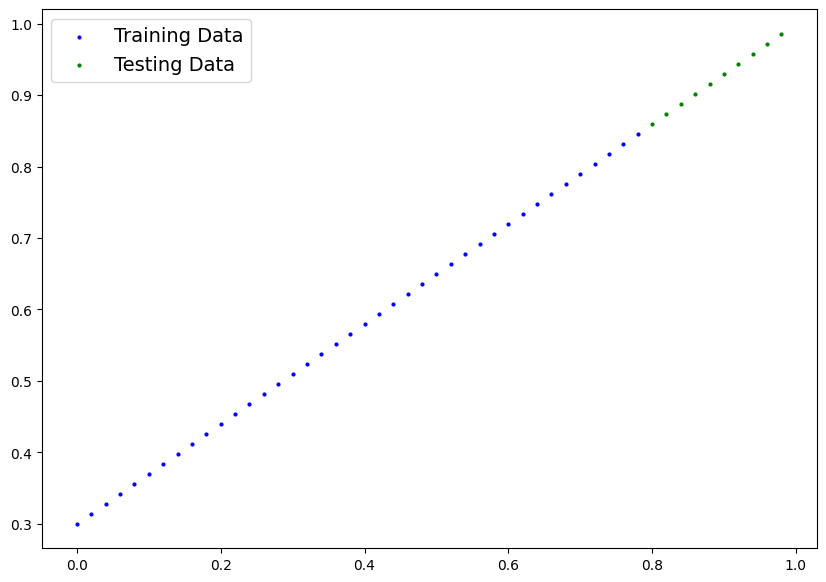

In [279]:
plot_predictions()

## 2 Build model
* Iniziamo con valori randomici (weight & bias)
* Guarderà ai nostri training data e aggiusterà i valori randomici per rappresentare meglio i valori ideali (wight & bias usati per crear ei dati)

Questa avverrà attraverso due algoritmi principali:

* **Gradient descend** (calcolo loss, calcolo dei delle derivate parziali rispetto la losso per il gradiente)
* **Backpropagation** ( I valori verranno passati all'indietro per sistemare i nuovi pesi, per determinare quanto ogni peso contribuisce all'errore)

In [280]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

PyTorch ha **4 moduli essenziali**.

Sono `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` e `torch.utils.data.DataLoader`. 

| `PyTorch module` | What does it do?|
|------------------|------------------|
| `torch.nn` |	Contiene tutti gli elementi costitutivi dei grafici computazionali (essenzialmente una serie di calcoli eseguiti in un modo particolare).|
| `torch.nn.Parameter`	 | Memorizza i tensori che possono essere utilizzati con `nn.Module`. Se `requires_grad=True`, i gradienti (utilizzati per aggiornare i parametri del modello tramite la discesa del gradiente) vengono calcolati automaticamente, questo viene spesso definito "autograd".|
| `torch.nn.Module` | 	La classe base per tutti i moduli di rete neurale, tutti i componenti fondamentali per le reti neurali sono sottoclassi. Se stai costruendo una rete neurale in PyTorch, i tuoi modelli dovrebbero essere sottoclassi di `nn.Module`. Richiede l'implementazione di un metodo `forward()`.|
| `torch.optim`	 | Contiene vari algoritmi di ottimizzazione (che indicano ai parametri del modello memorizzati in `nn.Parameter` come apportare le modifiche migliori per migliorare la discesa del gradiente e, di conseguenza, ridurre la perdita).|
| `def forward()`	 | Tutte le sottoclassi di `nn.Module` richiedono un metodo `forward()`, che definisce il calcolo che verrà eseguito sui dati passati al particolare nn.Module (ad esempio la formula di regressione lineare di cui sopra). |


Quasi ogni cosa in una rete neurale con PyTorch viene da `torch.nn`,

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

![](image/01-pytorch-linear-model-annotated.png)

### Checking the content of out PyTotch Model

`.parameters()`

In [281]:
# Create a random seed

torch.manual_seed(42)

# Create an istance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [282]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [283]:
weight, bias

(0.7, 0.3)

Il nostro goal è fare in modo che i valori siano il più vicini possibile a quelli da noi creati (che nella realtà non sono cosciuti)

## Making prediction using `torch.inference_mode()`

Per controllare il potere di predizione, veidamo quanto bene predice `y_test` basandosi su `X_test`
Quando passiamo dei dati al nostro modello, lui girerà attraverso il metodo `forward()`

In [284]:
# Make prediction with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

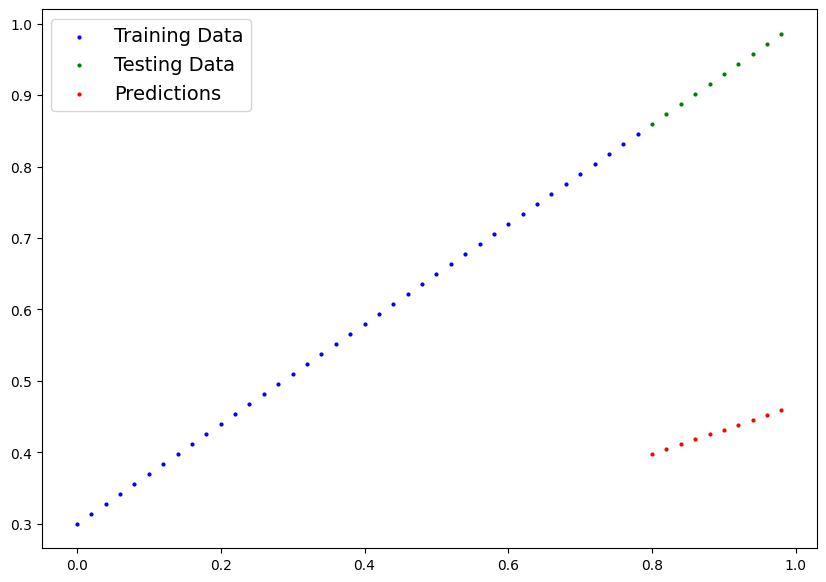

In [285]:
plot_predictions(predictions=y_preds.cpu())

### 3 Train model
L'intera idea di training per un modello è muoversi da *unknown* parameters (random) a *know* parameters.
Ovvero da una rappresentazione *scarsa* (i punti rossi) a una più accurata.

Un modo per misurare quanto male un modello predice i valori è usare la **loss function**

Una loss function può essere anche chiamata cost function o criterion function.

**Optimizer** prende la loss di un modello e aggiusta i parametri del modello per migliorare la loss function.




| Function	| What does it do?	| Where does it live in PyTorch?	| Common values |
|-----------|-------------------|-----------------------------------|---------------|
| **Loss function**	| Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_tes`t). Lower the better.	| PyTorch has plenty of built-in loss functions in `torch.nn`.	| Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`). |
| **Optimizer**	| Tells your model how to update its internal parameters to best lower the loss.	| You can find various optimization function implementations in torch.optim.	| Stochastic gradient descent (`torch.optim.SGD()`). Adam optimizer (`torch.optim.Adam()`). |


![mae](image/01-mae-loss-annotated.png)

In questo caso useremo `torch.nn.L1loss` che misura la differenza assoluta tre due punti (pred & label).

E per l'ottimizzatore `torch.optim.SGD(params, lr)`
- `params` is the target model parameters you'd like to optimize (e.g. the `weights` and `bias` values we randomly set before).
- `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called learning rate scheduling).

In [108]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Setup an optimizer (SGD -> Stochastic Gradient Descent)

optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In PyTorch abbiamo bisogno:
- Un training loop
- Un test loop

## Buildign a training loop and testing loop in PyTorch
0. Loop attraverso i dati
1. Forward pass (i dati che si muovono attraverso il nostro metodo `forward()` da input -> output, to make predictions on data)
2. Calculate Loss (comparare le predizioni alle true labels)
3. Optimizer zero grad
4. Loss Backward (**Back propagation**) - muoverci all'indietro nel network per calcolare i gradienti di ogni parametro del nostro modello rispettando la loss
5. Optimizer Step - Aggiustare i paremeti del modello per migliorare la loss (**gradient descent**)

| Number | Step name | What does it do?	| Code example |
|--------|-----------|------------------|---------------|
| 1 | **Forward pas**s | The model goes through all of the training data once, performing its forward() function calculations.	 | model(x_train) |
| 2 | **Calculate the loss** | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)`|
| 3 | **Zero gradients** | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()`|
| 4 | **Perform backpropagation on the loss** | Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards". | `loss.backward()`|
| 5 | **Update the optimizer (gradient descent**) | Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them. | `optimizer.step()`|

In [109]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [110]:
weight, bias

(0.7, 0.3)

In [111]:
torch.manual_seed(42)

# An epoch is oine loop throug the data
epochs = 200 # è un iperparametro perché è impostato da noi

# tracking different values
epoch_count = []
loss_values = []
test_loss_values = []


### Trainining
# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # imposta tutti i parametri che richiedono i gradienti

    # 1 Forward pass
    y_pred = model_0(X_train)

    # 2 calculate loss
    loss = loss_fn(y_pred, y_train)
    # print(f"loss {loss}")

    # 3 Optimizer zero grad
    optimizer.zero_grad()

    # 4 perform backpropagation on the loss 
    loss.backward()

    # 5 step the optimizer (gradient descent)
    optimizer.step() # di defatult si accumula nle loop, quindi dobbiamo riportarli a zero nello step 3

    ### Testing
    model_0.eval() # spegne diverse impostazioni che servono per il testing e valutazione (dropout / batch norm layers)
    with torch.inference_mode(): # spegne il tracciamento dei gradienti che non serve in questa case
        # 1 forward
        test_pred = model_0(X_test)

        # 2 calculate loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}" )

        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288135051727295 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713389158249 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.2172965705394745
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148530423641205 | Test loss: 0.14464019238948822
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953748226166
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633813381195
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]

In [86]:
# with torch.inference_mode():
    # y_preds_news = model_0(X_test)

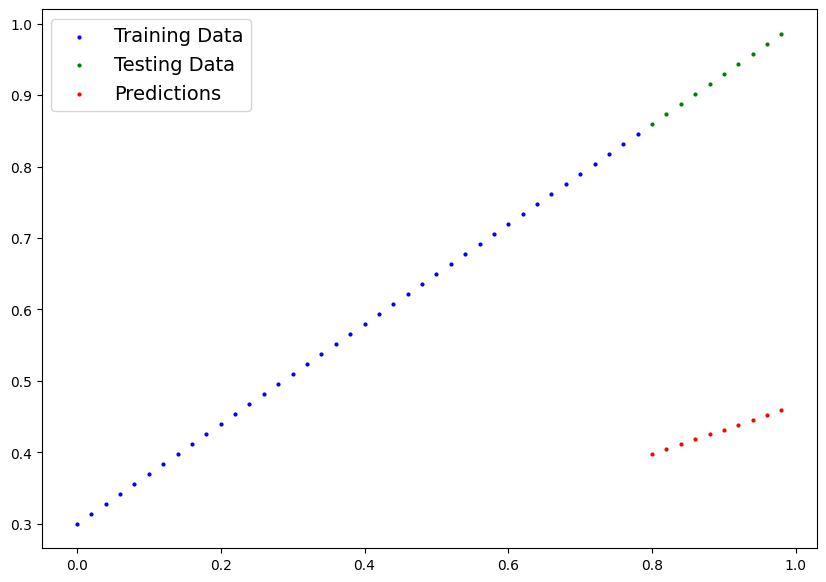

In [112]:
plot_predictions(predictions=y_preds)

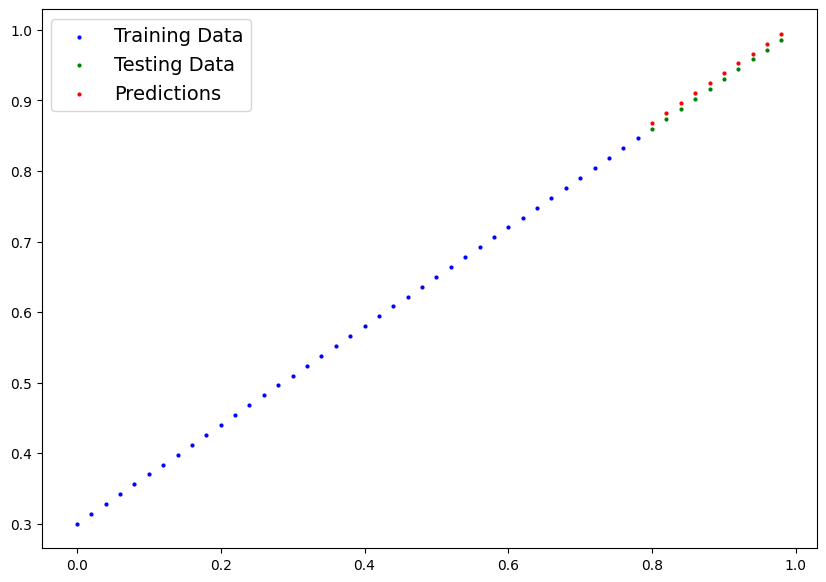

In [113]:
plot_predictions(predictions=test_pred)

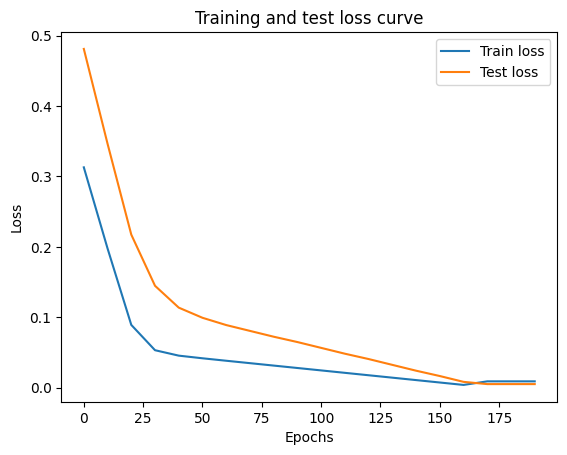

In [120]:
import numpy as np
# usiamo numpy perché i loss_values sono tensori
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

CI sono 3 metodi principali per salvare e caricare i modelli in PyTorch:
- `torch.save()` salva in modello in pickle format.
- `torch.load()` carica
- `torch.nn.Module_load_state_dict()` carica un uno state dict di un modello precedentemente salvato

In [121]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
# saving our PyTorch model

from pathlib import Path

# 1 create model dir
MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch_Workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3 save model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_PyTorch_Workflow_model_0.pth


# Loading a PyTorch Model
Visto che abbiamo salvato lo `state_dict` invece dell'intero modello, creiamo una nuova istanza della nostra classe e carichiamo in essa lo state dict

In [123]:
# To load in a saved state_dict dobbiamo istanziare una nuova classe model
loaded_model_0 = LinearRegressionModel()

# load the save state_dict of model_0 (per aggiornare i parametri)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [124]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [125]:
# Make some prediction with loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [128]:
# Make some models preds

model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [129]:
# compare loaded model preds with original models preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Saving state_dict vs saving model

Differenze principali:

1. Cosa viene salvato:

- state_dict: Salva solo i parametri addestrati (pesi e bias)
- Modello intero: Salva l'intera definizione della classe e i parametri


2. Dimensione file:

- state_dict: File più piccoli
- Modello intero: File generalmente più grandi


3. Flessibilità:

- state_dict: Più flessibile, permette di caricare i pesi in modelli con architetture leggermente diverse
- Modello intero: Meno flessibile, richiede che il codice della classe sia identico


4. Dipendenze:

- state_dict: Non dipende dalla definizione esatta del codice della classe
- Modello intero: Dipende dalla definizione del codice (può causare problemi se cambi il codice)


5. Portabilità:

- state_dict: Più portabile tra versioni diverse di PyTorch
- Modello intero: Potrebbe avere problemi di compatibilità tra versioni



La pratica consigliata è generalmente salvare lo state_dict, in quanto offre maggiore flessibilità e portabilità, specialmente per progetti in evoluzione o da condividere con altri.

## Putting it all togheter

In [286]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check version

torch.__version__

'2.7.0'

Create **device-agnostic code**.
Se non c'è un GPU useremo la CPU

In [287]:
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# Poi usa
device = get_device()

print(f"Using device: {device}")

Using device: mps


### Data 

In [288]:
# Create some data using linear regression formula y = weight * X + bias ( y = mx + c)

weight = 0.7
bias = 0.3

# Create range values

start = 0

end = 1

step = 0.02

# Create X and y (Features and labels)
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [289]:
# split data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

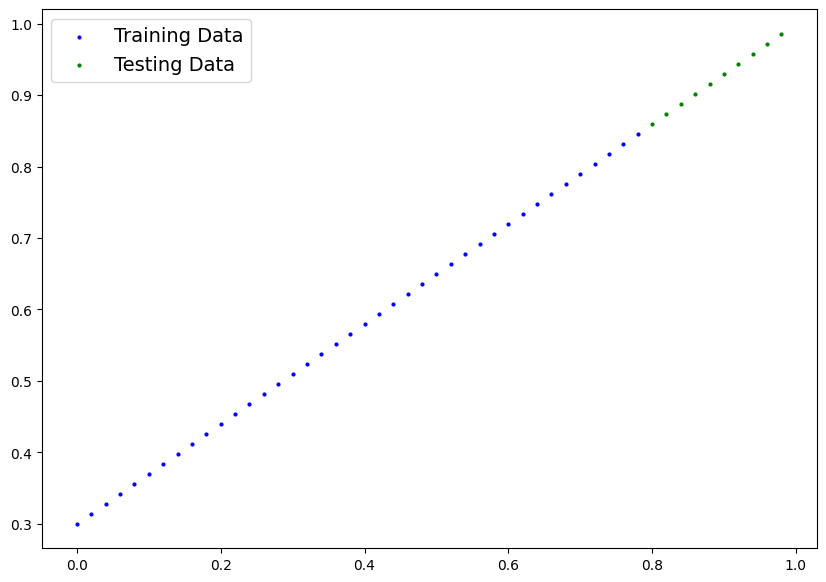

In [290]:
# Plot the data 
plot_predictions(X_train, y_train, X_test, y_test)

### building a model

Non inizializziam i parametri in maniera manuale come fattto prima ma usiamo delle funzioni prebuilt di PyTorch

In [291]:
# create a linear model by subclassing `nn.Module`
class LinearModelRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)
    def forward(self,x: torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)

# manual seed
torch.manual_seed(42)
model_1 = LinearModelRegressionV2()

model_1, model_1.state_dict()

(LinearModelRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

![](image/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)

In [292]:
# CHeck model current device

next(model_1.parameters()).device

device(type='cpu')

In [293]:
# set the model to use target device
model_1.to(device)

next(model_1.parameters()).device

device(type='mps', index=0)

### training

- Loss function
- optimizer
- training loop
- testing loop

In [294]:
# setup loss function

loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)




In [295]:
# training loop

torch.manual_seed(42)

epochs = 200

# Put data on target device (agnosti code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # forward
    y_pred = model_1(X_train)

    # calculate loss

    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()


    ### testing
    model_1.eval()
    with torch.inference_mode():
        test_pred =model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # print what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    

Epoch: 0 | Loss: 0.5551779270172119 | Test Loss: 0.5739762783050537
Epoch: 10 | Loss: 0.4399681091308594 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984672844409943
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513688966631889
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956793636083603 | Test Loss: 0.04580312967300415
Epoch: 70 | Loss: 0.016517985612154007 | Test Loss: 0.037530578672885895
Epoch: 80 | Loss: 0.013089167885482311 | Test Loss: 0.02994491532444954
Epoch: 90 | Loss: 0.009653175249695778 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215682718902826 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814170930534601
Epoch: 120 | Loss: 0.0012645088136196136 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645088136196136 | Test Loss: 0.01380180753

In [296]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

In [297]:
weight,bias

(0.7, 0.3)

### Making and evaluating predictions


In [298]:
# turn model into evaluation mode
model_1.eval()

# Make prediction on test data

with torch.inference_mode():
    y_preds= model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

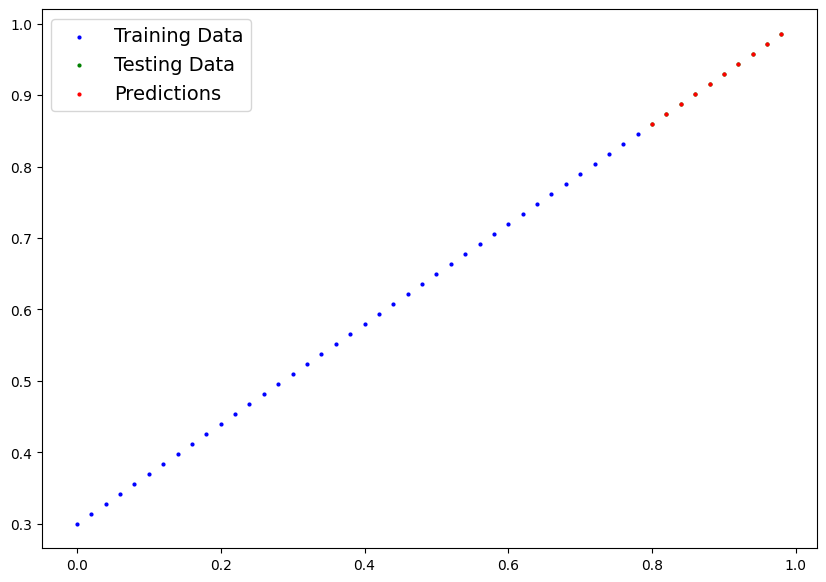

In [299]:
plot_predictions(predictions=y_preds.cpu())

### Saving and loading trained model

In [155]:
from pathlib import Path

# create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH
# PosixPath('models/01_pytorch_workflow_model_1.pth')

# save the model state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_1.pth


In [156]:
# Load a PyTorch Model

# Create new istance
loaded_model_1 = LinearModelRegressionV2()

# Load saved model_1 staate dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put loaded model to device
loaded_model_1.to(device)


                               

LinearModelRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [158]:
next(loaded_model_1.parameters()).device

device(type='mps', index=0)

In [159]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

In [160]:
# evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')

## Exercise
### Create a straight line dataset using the linear regression formula `weight * X + bias`

In [310]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [311]:
weight = 0.3
bias = 0.9


# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [312]:
len(X)

100

In [313]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

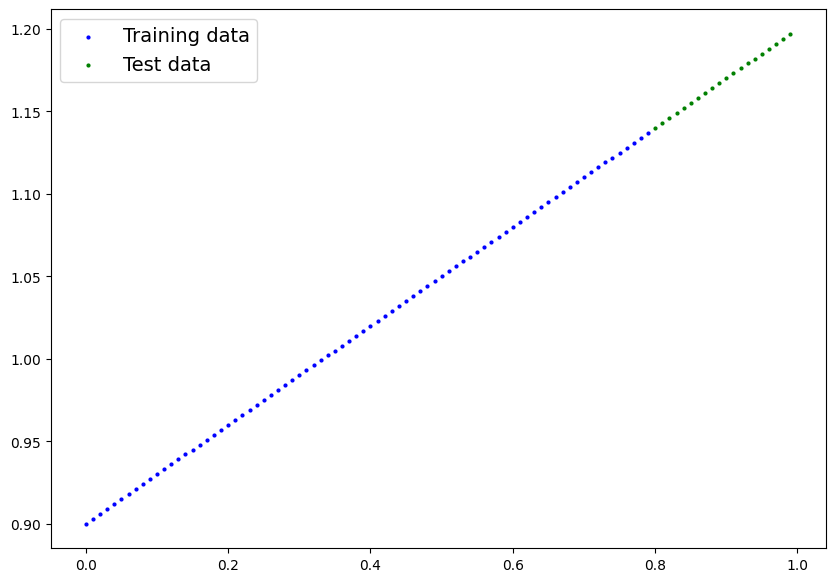

In [314]:

# Plot the training and testing data 
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
plot_predictions()

### Build a PyTorch Model by subclassing `nn.Module`

In [315]:
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# manual seed
torch.manual_seed(42)

# istanzio il modello
model_2 = LinearRegressionModelV3()

model_2, model_2.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [316]:
next(model_2.parameters()).device

device(type='cpu')

In [317]:
# Instantiate the model and put it to the target device
model_2.to(device)
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='mps:0', requires_grad=True)]

### Create a loss function and optimize

In [318]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [319]:
### Training loop
epochs = 300

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # model to train mode
    model_2.train()

    # 1 forward pass
    y_pred = model_2(X_train)

    # 2 Calcolo loss
    loss = loss_fn(y_pred, y_train)

    # 3 zero gradients
    optimizer.zero_grad()

    # 4 back propagation on the loss
    loss.backward()

    # 5 Step the optimizer
    optimizer.step()
    
    if epoch % 20 == 0 or epoch == epochs -1:
        # Testing
        # model to test mode
        model_2.eval()

        # forward pass
        with torch.inference_mode():
            y_preds = model_2(X_test)

            # calcolo loss test 
            test_loss = loss_fn(y_preds, y_test)
            print(f"In Epoch {epoch}: Loss {loss} | Test Loss {test_loss}" )

    

In Epoch 0: Loss 0.1275613158941269 | Test Loss 0.33650320768356323
In Epoch 20: Loss 0.08187222480773926 | Test Loss 0.21840262413024902
In Epoch 40: Loss 0.07207288593053818 | Test Loss 0.17458660900592804
In Epoch 60: Loss 0.06507988274097443 | Test Loss 0.15310418605804443
In Epoch 80: Loss 0.05822876840829849 | Test Loss 0.1367770880460739
In Epoch 100: Loss 0.05137667804956436 | Test Loss 0.12079393863677979
In Epoch 120: Loss 0.044525567442178726 | Test Loss 0.10446683317422867
In Epoch 140: Loss 0.037674423307180405 | Test Loss 0.08813949674367905
In Epoch 160: Loss 0.03082224540412426 | Test Loss 0.0721558928489685
In Epoch 180: Loss 0.02397104725241661 | Test Loss 0.05582833290100098
In Epoch 200: Loss 0.017119845375418663 | Test Loss 0.03950076177716255
In Epoch 220: Loss 0.010267666541039944 | Test Loss 0.02351721003651619
In Epoch 240: Loss 0.0034168988931924105 | Test Loss 0.007191836833953857
In Epoch 260: Loss 0.007878490723669529 | Test Loss 0.007064247038215399
In Epo

In [320]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='mps:0')

In [321]:
len(y_preds)

20

In [322]:
y_preds.cpu()

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]])

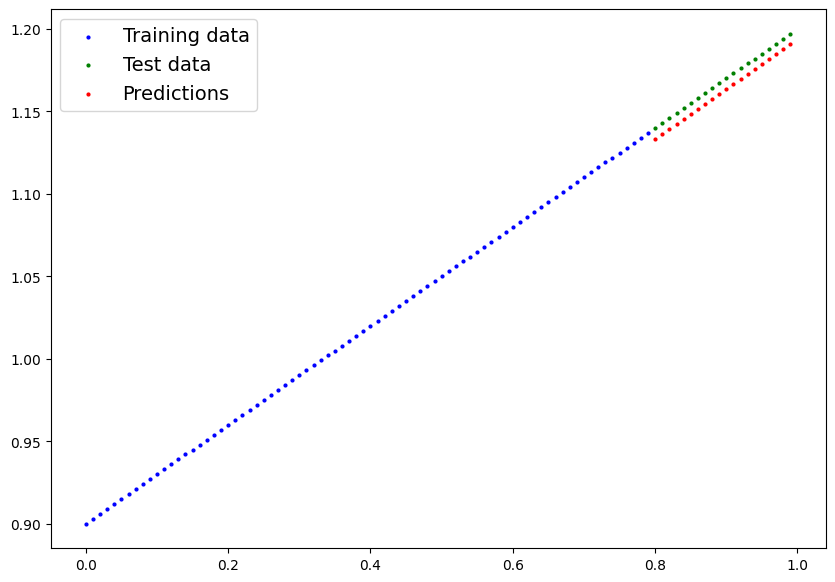

In [324]:
plot_predictions(predictions=y_preds.cpu())

### Save the trained model's `state_dict()`

In [326]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path 
MODEL_NAME = "01_pytorch_model_homework"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),f = MODEL_SAVE_PATH)
     

Saving model to models/01_pytorch_model_homework


In [327]:

# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModelV3()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModelV3(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [328]:


# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')

In [329]:
loaded_model.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='mps:0')),
             ('linear_layer.bias', tensor([0.8910], device='mps:0'))])

### Extra-curriculum
- Listen to [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
- Read [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
- Spend 1-2 hours reading/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
- [Wikipedia page for gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
- [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
- [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
- [What is backpropagation really doing? video](https://youtu.be/Ilg3gGewQ5U) by 3Blue1Brown
- [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)